## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
df=pd.merge(mouse_metadata,study_results)
df.head(15)
# Combine the data into a single dataset


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice in the DataFrame.
df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df["Mouse ID"].value_counts()

g989    13
c757    10
i177    10
g791    10
k382    10
        ..
x226     1
f932     1
h428     1
l872     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2=df.drop_duplicates(subset="Mouse ID", keep="first", inplace=False)
df2


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

df3=df.groupby("Drug Regimen")
summary_df = pd.DataFrame({"Mean":df3['Tumor Volume (mm3)'].mean(),
                           "Median": df3['Tumor Volume (mm3)'].median(),
                           "Variance":df3['Tumor Volume (mm3)'].var(),
                           "Standard Deviation": df3['Tumor Volume (mm3)'].std(),
                           "SEM":df3['Tumor Volume (mm3)'].sem()})
summary_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

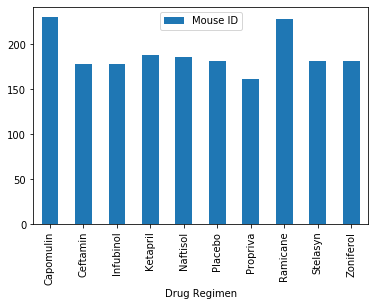

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
dr_count1=pd.DataFrame(df3["Mouse ID"].count())
#dr_count1.rename(columns={"Mouse ID":"count"})
#print(dr_count1.columns)

dr_count1.plot.bar()


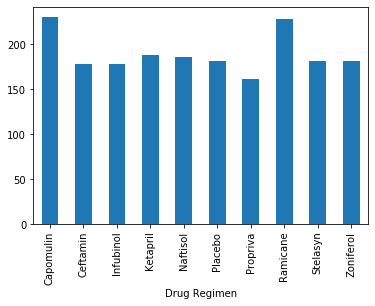

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
dr_count2=df3["Mouse ID"].count()
dr_count2.plot(kind="bar")

## Pie Plots

        Mouse ID  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
Sex                                                                          
Female       935         935        935                 935               935
Male         958         958        958                 958               958


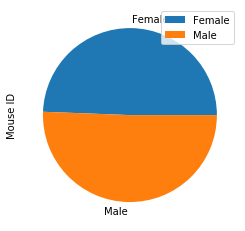

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using panda
df4=df.groupby("Sex")
df4_pd=pd.DataFrame(df4.count())
df4_pd=df4_pd.drop(columns=["Drug Regimen","Age_months"])#when drop something, asign it to itself
df4_pd.plot.pie(y="Mouse ID")
print(df4_pd) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a1f9fd0>],
      dtype=object)

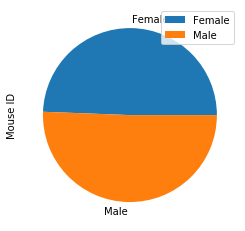

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df4_count=df4.count()
df4_count=df4_count.drop(columns=["Drug Regimen","Age_months",'Weight (g)',"Timepoint",'Tumor Volume (mm3)','Metastatic Sites'])
#df4_count
df4_count.plot(kind="pie",subplots=True)

## Quartiles, Outliers and Boxplots

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


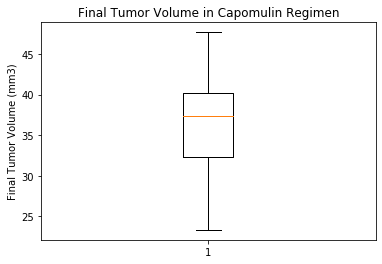

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# df5=df3
# df5=df5['Tumor Volume (mm3)']
# df5=pd.DataFrame(df5.count())
sorted_df = df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
#cap_list
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

#change isin(["Capomulin"] to isin(["Ramicane"]) and so on to get the rest three boxplots

#df5["Capomulin"]
# myl=[]
# for i in df5['Tumor Volume (mm3)']:
#     myl.append(i)
    
# fig1, ax1 = plt.subplots()
# ax1.boxplot(myl)
# plt.show()

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


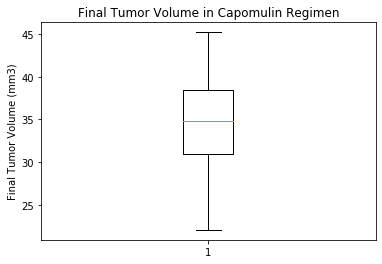

In [13]:
sorted_df = df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()
cap_data_df = max_df[max_df['Drug Regimen'].isin(["Ramicane"])]
cap_data_df.head().reset_index()
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
#cap_list
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()


The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


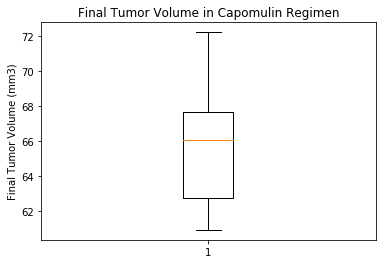

In [18]:
sorted_df = df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
cap_data_df.head().reset_index()
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
#cap_list
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()


The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


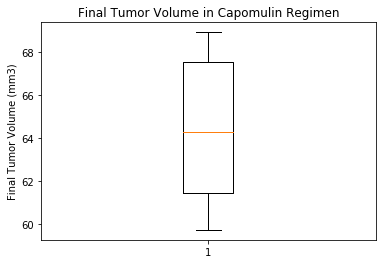

In [19]:
sorted_df = df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
cap_data_df.head().reset_index()
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
#cap_list
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

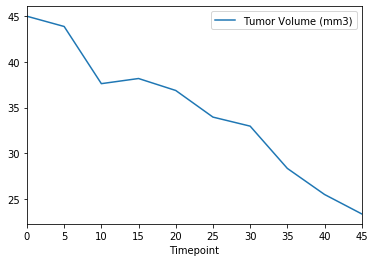

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df6=df.loc[df["Drug Regimen"]=="Capomulin"]
#df6=pd.DataFrame(columns={"TimePoint":"Timepoint",'Tumor Volume (mm3)':'Tumor Volume (mm3)''})
df6 = df6.loc[df6["Mouse ID"] == "s185"]
df6=df6[["Timepoint",'Tumor Volume (mm3)']]
#df6.plot()
df6.plot(x="Timepoint",y='Tumor Volume (mm3)')

In [80]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df7=df.loc[df["Drug Regimen"]=="Capomulin"]
df7=df7.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
#df7=df7.groupby("Mouse ID")
#num=df7['Tumor Volume (mm3)'].mean()
num=df7["Tumor Volume (mm3)"].mean()
df7["mean"]=num
df7=df7.groupby("Mouse ID")
#df7=df7["Mouse ID"].unique()
#df7=df7.drop(columns={'Tumor Volume (mm3)']})

df7.head()
#df7.insert("mean",num)
#df7.plot(kind="scatter",x=df7.count()['Weight (g)'],y=num)
#average_cap = pd.DataFrame(df7.groupby(["Mouse ID", "Weight (g)"]))["Tumor Volume (mm3)"].mean()
#??????????????????????????????????????????
df7.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

,Mouse ID,Weight (g),Tumor Volume (mm3),mean
10,s185,17,45.000000,40.675741
11,s185,17,43.878496,40.675741
12,s185,17,37.614948,40.675741
13,s185,17,38.177232,40.675741
14,s185,17,36.866876,40.675741
...,...,...,...,...
435,i557,24,43.967895,40.675741
1452,r157,25,45.000000,40.675741
1453,r157,25,45.597064,40.675741
1454,r157,25,46.059608,40.675741


## Correlation and Regression

In [17]:
mouse_weight = df7.iloc[:,0]
avg_tumor_volume = df7.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = df7['Weight (g)']
y_values = df7['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()
